# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name:  Viz Visionaries
Created by NAMES (SJSU IDs) : 016115515, 
Last updated: DATE  
Briefly describe your dataset: The LendingClub dataset contains information about loan applicants, their financial backgrounds, and repayment outcomes. Each row represents a loan application, with the key target variable loan_status (Fully Paid, Current, Charged-off). Features include loan details (amount, term, interest rate, grade), borrower profile (income, employment, home ownership), credit history (dti, revolving balance, accounts), and purpose. Applicants labeled Charged-off are treated as defaulters, making this dataset useful for risk analytics, exploratory analysis, and predictive modeling.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the folder containing the real CSV

df = pd.read_csv('accepted_2007_to_2018Q4.csv')

print(df.shape)
df.head()

/var/folders/pw/rtr07675107fvmf8dp_fk8qh0000gn/T/ipykernel_60515/3591853578.py:8: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


(2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)


member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_end_date                             2249784
hardship_start_date                           2249784
hardship_type                                 2249784
                                               ...   
policy_code                                        33
revol_bal                                          33
fico_range_high                                    33
fico_range_low                                     33
id                                                  0
Length: 151, dtype: int64


In [97]:
# Drop columns with more than 95% missing
threshold = 0.95 * len(df)   # 95% of total rows
df = df.dropna(axis=1, thresh=threshold)

In [98]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data)



bc_util                    76104
percent_bc_gt_75           75412
bc_open_to_buy             74968
mths_since_recent_bc       73445
pct_tl_nvr_dlq             70464
                           ...  
collection_recovery_fee       33
last_pymnt_amnt               33
loan_amnt                     33
last_fico_range_low           33
id                             0
Length: 88, dtype: int64


### Q2: Show the data type for each column of the dataframe

In [99]:
# Your code here . . .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 88 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  title                       object 
 18  zip_code                    object 
 19  addr_state           

### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

In [100]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc

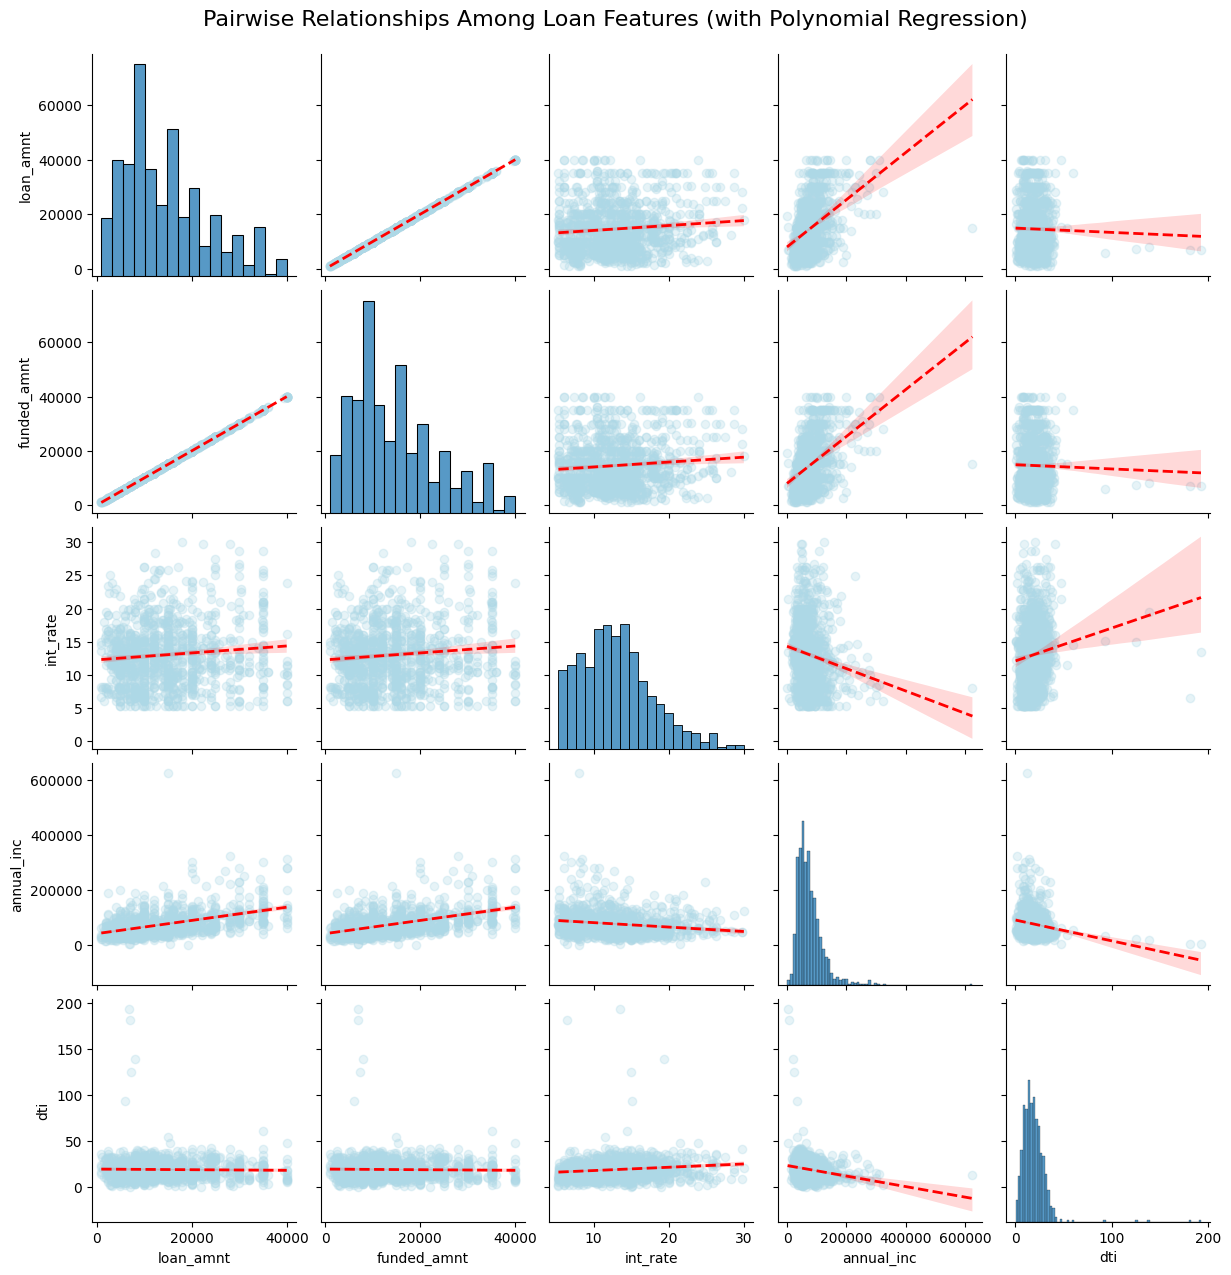

In [101]:
cols = ["loan_amnt", "funded_amnt", "int_rate", "annual_inc", "dti"]

sns.pairplot(
    df[cols].sample(1000, random_state=42),   
    kind="reg",                               
    plot_kws={"scatter_kws": {"alpha": 0.3, "color": "lightblue"},
              "line_kws": {"color": "red", "lw": 2, "linestyle": "--"}}
)

plt.suptitle("Pairwise Relationships Among Loan Features (with Polynomial Regression)", y=1.02, fontsize=16)
plt.show()


### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

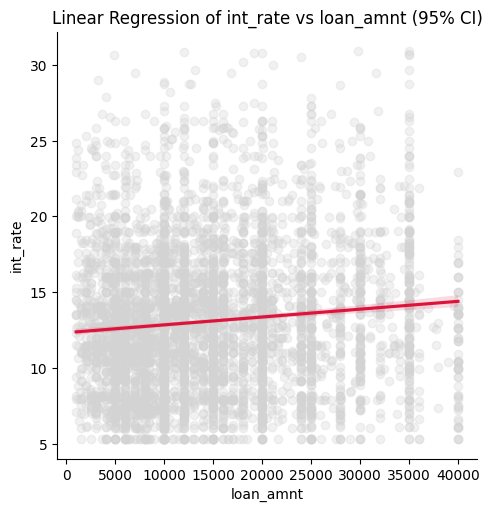

In [102]:
# Your code here . . .
xcol, ycol = "loan_amnt", "int_rate"  


plot_df = df[[xcol, ycol]].dropna().sample(n=min(5000, len(df)), random_state=42)

sns.lmplot(
    data=plot_df,
    x=xcol, y=ycol,
    scatter_kws={"alpha": 0.3, "color": "lightgray"},
    line_kws={"color": "crimson"}
)

plt.title(f"Linear Regression of {ycol} vs {xcol} (95% CI)")
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.show()


### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

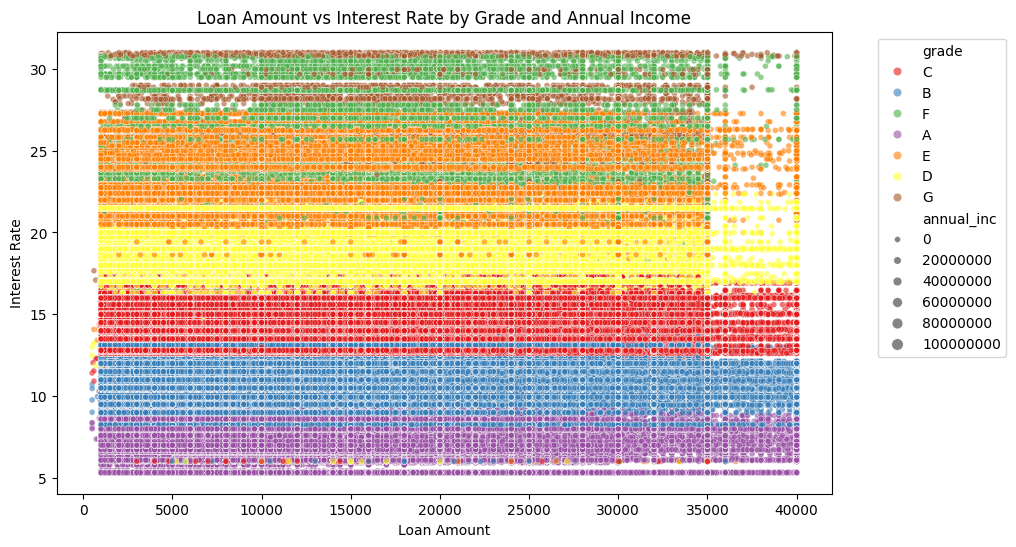

In [103]:
# Your code here . . .
plot_df = df[['loan_amnt', 'int_rate', 'grade', 'annual_inc']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x="loan_amnt",
    y="int_rate",
    hue="grade",
    size="annual_inc",
    alpha=0.6,
    palette="Set1"
)

plt.title("Loan Amount vs Interest Rate by Grade and Annual Income")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

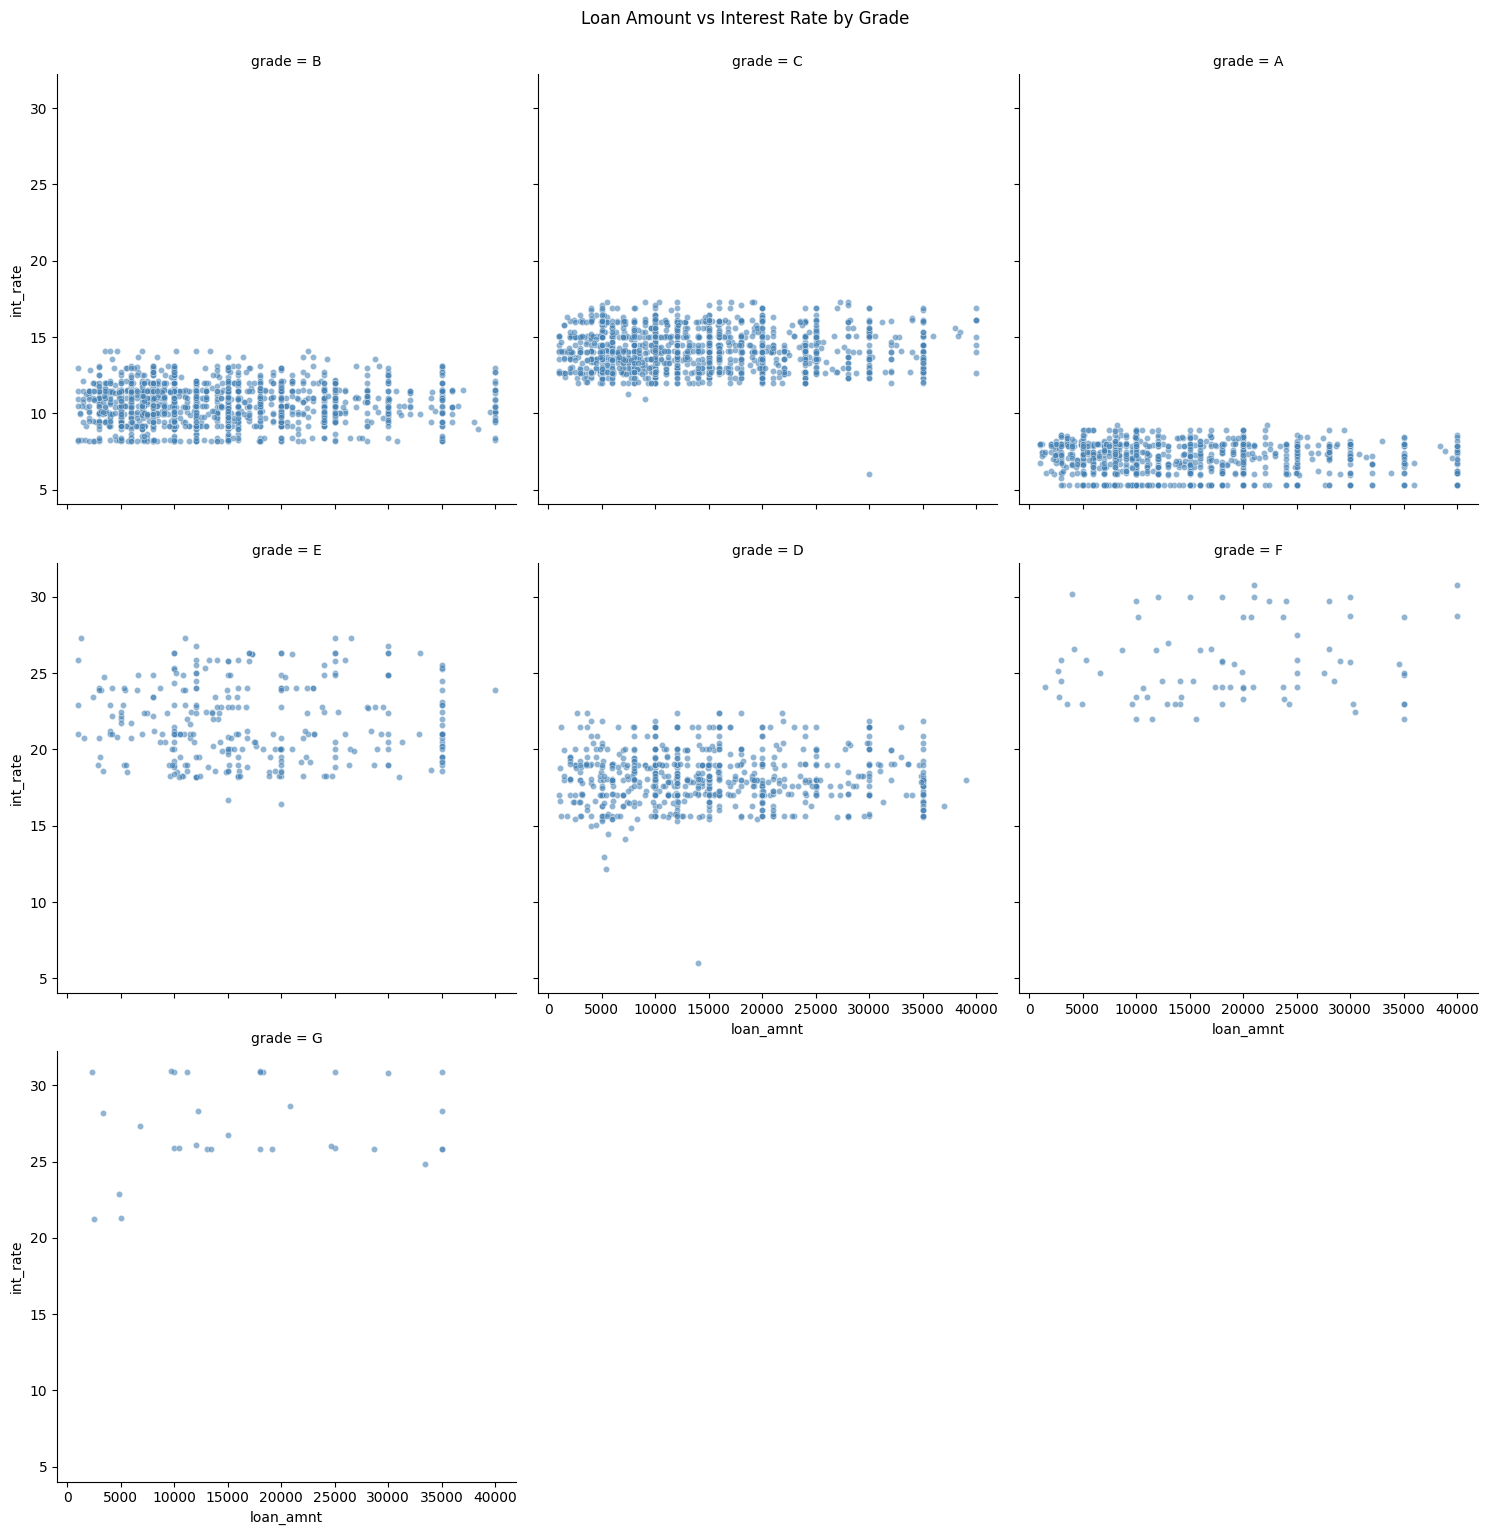

In [104]:

g = sns.relplot(
    data=df.sample(5000, random_state=42),  
    x="loan_amnt",
    y="int_rate",
    col="grade",         
    col_wrap=3,          
    height=5,            
    kind="scatter",
    color="steelblue",
    s=20,                
    alpha=0.6            
)

g.fig.suptitle("Loan Amount vs Interest Rate by Grade", y=1.02)
plt.show()
